# Dimensionality Reduction II

<a href="?print-pdf">print view</a>  
<a href="lecture17-dimred-1.ipynb" download>notebook</a>

# Different types of dimensionality reduction approaches
## Linear
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
## Non-Linear
- t-distributed stochastic neighbor embedding (t-SNE)
- Uniform manifold approximation and projection (UMAP)

# PCA vs LDA

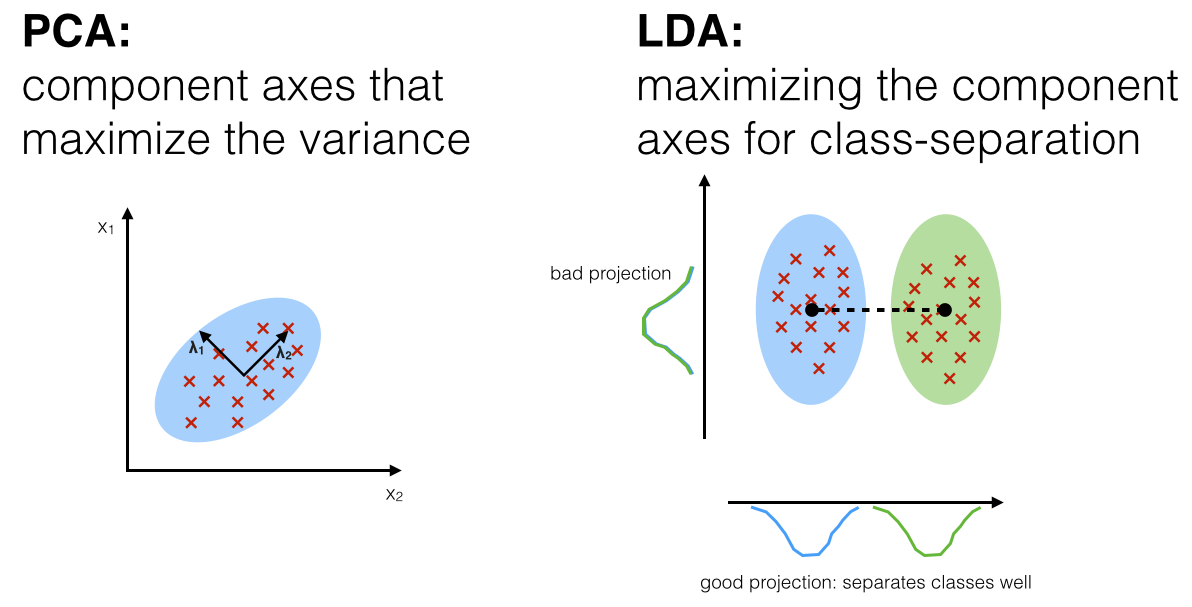

## Now let us consider data on a manifold

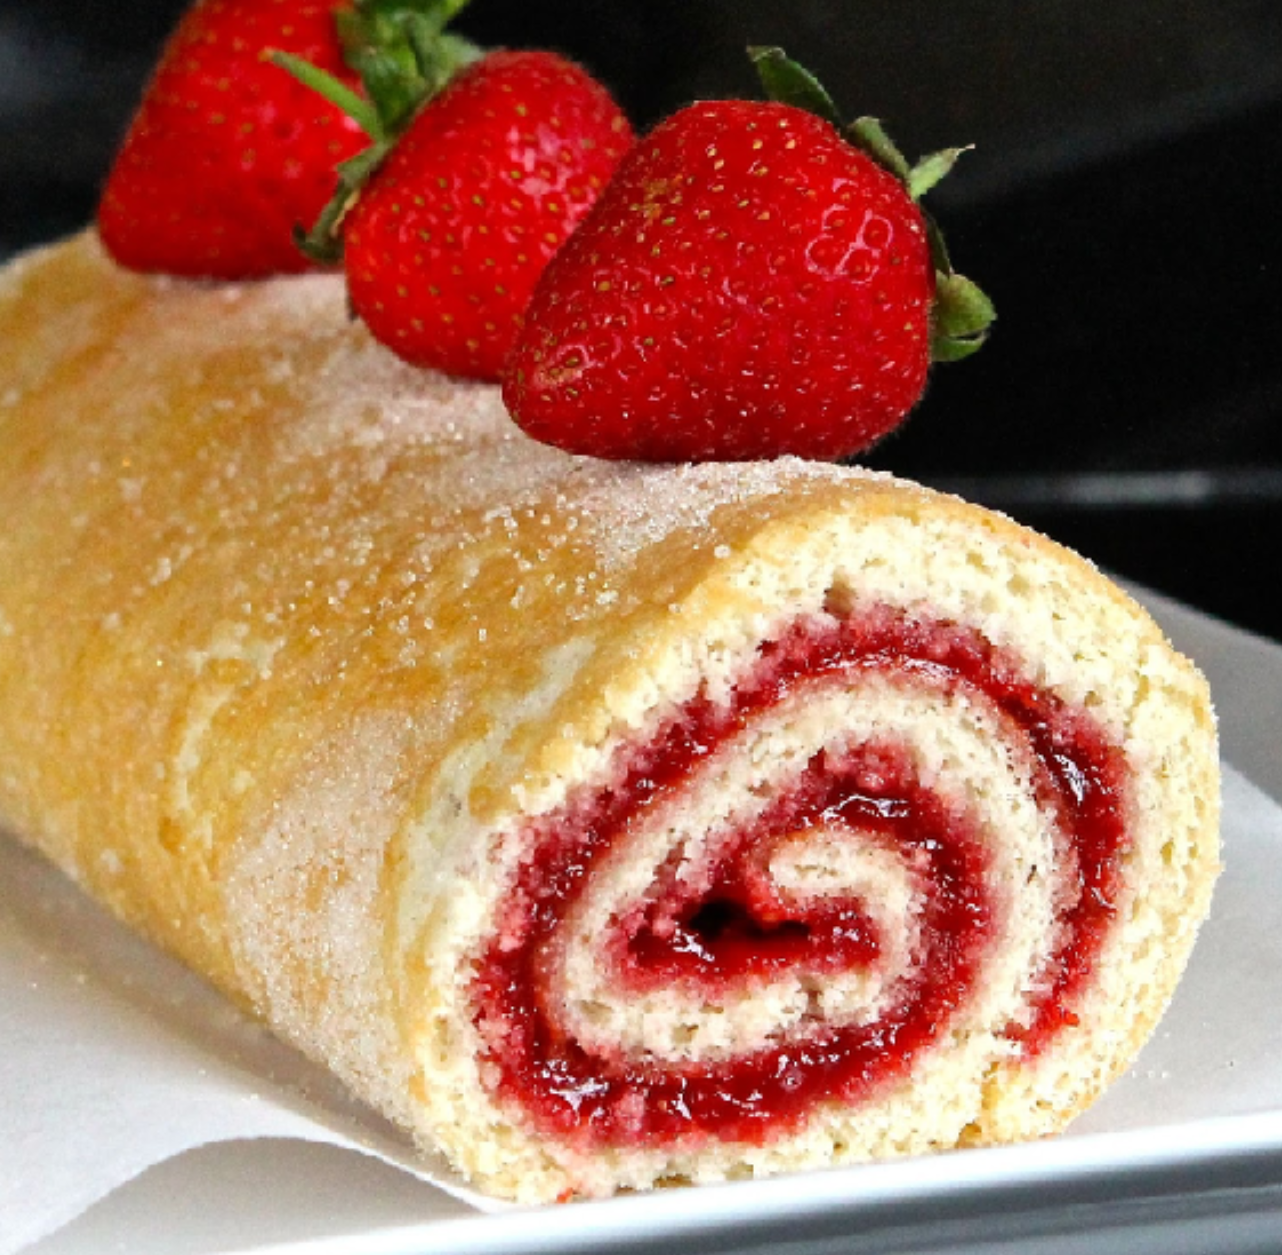

In [1]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

points, colors = make_swiss_roll(n_samples=3000, random_state=10);

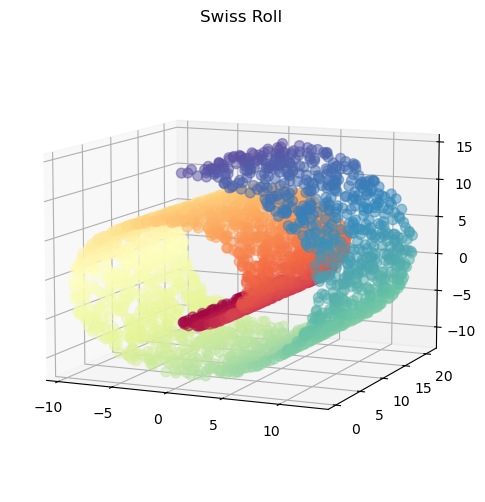

In [80]:
#Let's plot the Swiss roll
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    points[:, 0], points[:, 1], points[:, 2], c=colors, 
    s=50, alpha=0.5, cmap=plt.cm.Spectral
)
ax.set_title("Swiss Roll")
ax.view_init(azim=-66, elev=10)
#_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

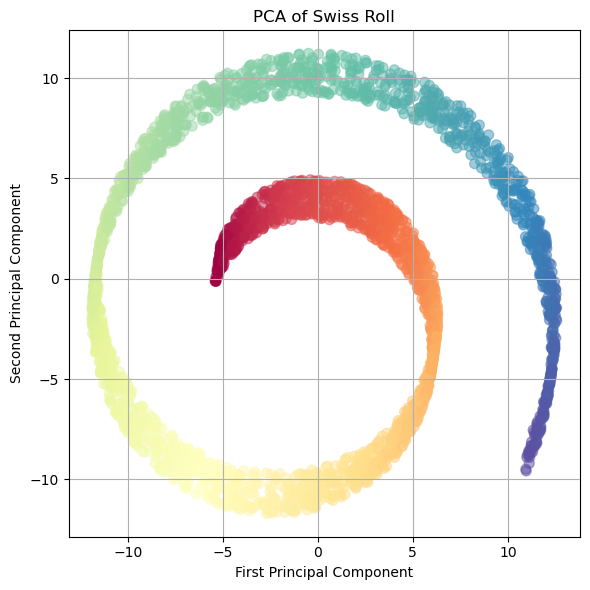

In [81]:
#lets perform PCA on the swiss roll
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_result = pca_model.fit_transform(points)

plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, 
            s=50, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Swiss Roll')
plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
# Is the following better 2D projection though?

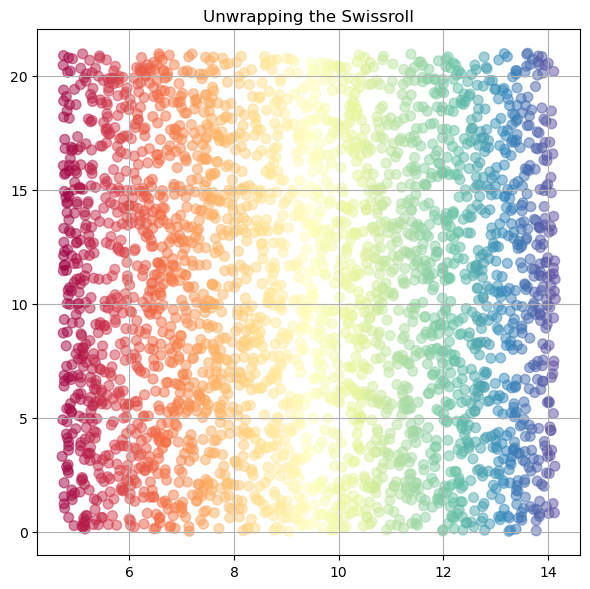

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(colors,points[:,1], c=colors, s=50, alpha=0.5, cmap=plt.cm.Spectral)
plt.title('Unwrapping the Swissroll')
plt.grid(True)

plt.tight_layout()
plt.show()

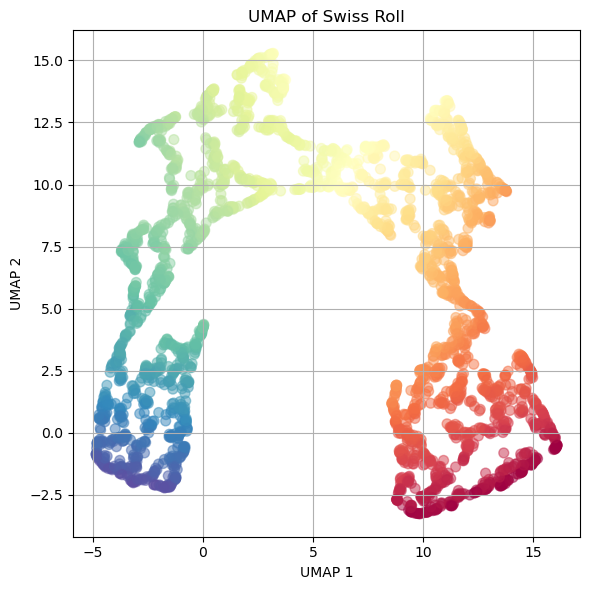

In [10]:
import umap
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(points, n_neighbors=100, min_dist = .5)

plt.figure(figsize=(6, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors, s=50, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of Swiss Roll')
plt.grid(True)

plt.tight_layout()
plt.show();

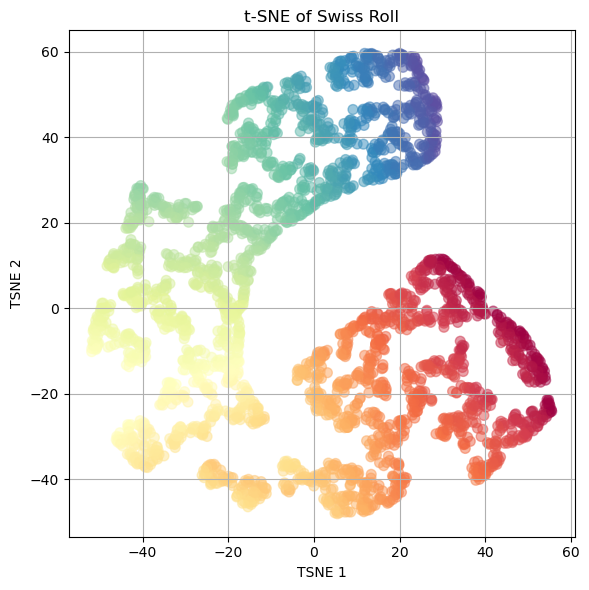

In [11]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(points)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors, s=50, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE of Swiss Roll')
plt.grid(True)

plt.tight_layout()
plt.show();

# UMAP: Uniform Manifold Approximation & Projection
 
https://umap-learn.readthedocs.io/en/latest/index.html

Idea: Prioritize respecting **local** distances in embedding space.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_open_cover.png">

# UMAP: Uniform Manifold Approximation & Projection

UMAP constructs a $k$-nearest neighbors graph of the data.  It uses an approximate **stochastic** algorithm to do this quickly.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_graph.png">

## UMAP: Uniform Manifold Approximation & Projection

Optimizes position of data points in low dimensional space to balance <font color='blue'>attraction</font> of locally adjacent points and <font color='darkred'>repulsion</font> of unconnected, distance points.

$$\mathrm{minimize}\sum_{e\in E} \color{blue}{ w_h(e) \log\left(\frac{w_h(e)}{w_l(e)}\right)} + \color{darkred}{(1 - w_h(e)) \log\left(\frac{1 - w_h(e)}{1 - w_l(e)}\right)}$$

$w_h(e)$ weight of edge in **high** dimensional space (larger weight = smaller distance)

$w_l(e)$ weight of edge in **low** dimensional space (larger weight = smaller distance)

This optimization is done using **stochastic gradient descent** starting at a deterministically constructed initial embedding.

# UMAP Parameters

* `n_neighbors` (15): Number of nearest neighbors to consider.  Increase to respect global structure more.
* `min_dist` (0.1): Minimum distance between points in reduced space. Decrease to have more tightly clustered points.
* `metric` ("euclidean"): How distance is computed.  Can provide user-supplied functions in addition to standard metrics

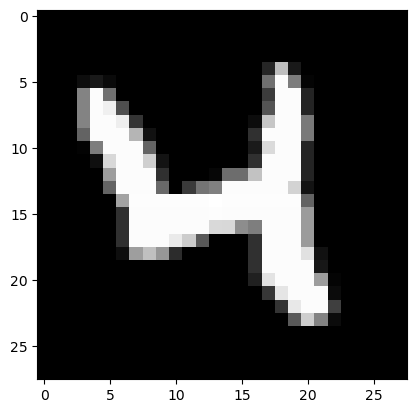

In [83]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data
mnist_label = mnist.target
pixels = np.array(mnist_data.iloc[20]).reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

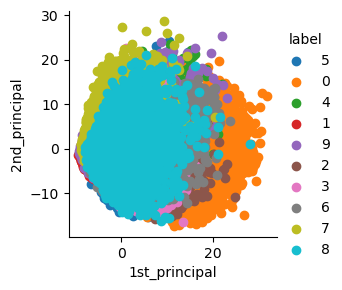

In [86]:
from sklearn.preprocessing import StandardScaler as ss
import seaborn as sns
import pandas as pd
scaler = ss();
mnist_data_transform = scaler.fit_transform(mnist_data)
pca_mnist = PCA(n_components=2);
pca_mnist_results = pca_mnist.fit_transform(mnist_data_transform)
mnist_label2 = np.array(mnist_label).reshape(-1,1)
df_mnist = np.hstack((pca_mnist_results,mnist_label2))
sns.FacetGrid(pd.DataFrame(df_mnist,
            columns=("1st_principal", "2nd_principal", "label")), hue = "label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

In [89]:
umap_mnist_model = umap.UMAP(random_state=42)
umap_mnist_result = umap_mnist_model.fit_transform(mnist_data, n_neighbors=15, min_dist = 0.1)

C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


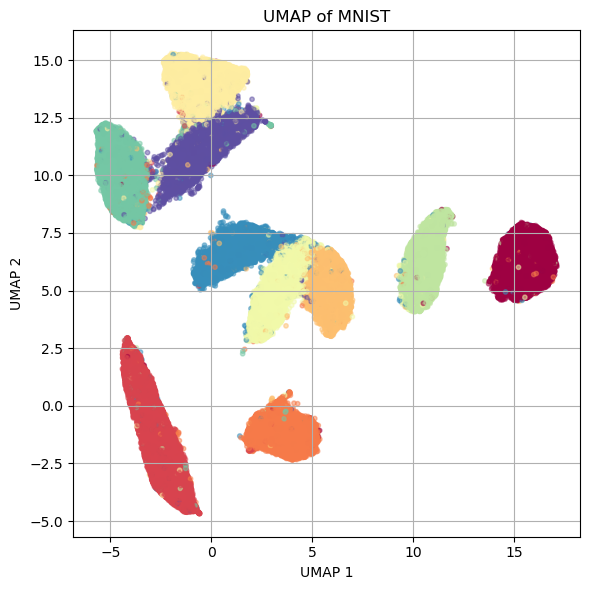

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mnist_color = le.fit_transform(mnist_label)
plt.figure(figsize=(6, 6))
plt.scatter(umap_mnist_result[:, 0], umap_mnist_result[:, 1], c=mnist_color, s=10, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of MNIST')
plt.grid(True)

plt.tight_layout()
plt.show();

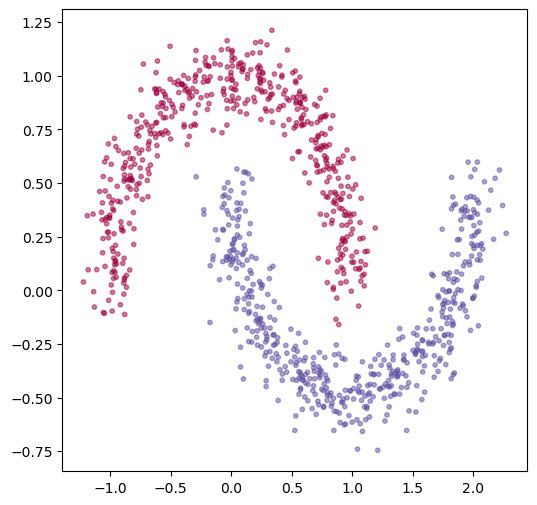

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from umap import UMAP

# Generate synthetic data
n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=0.5, cmap=plt.cm.Spectral)

C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\umap\umap_.py:19

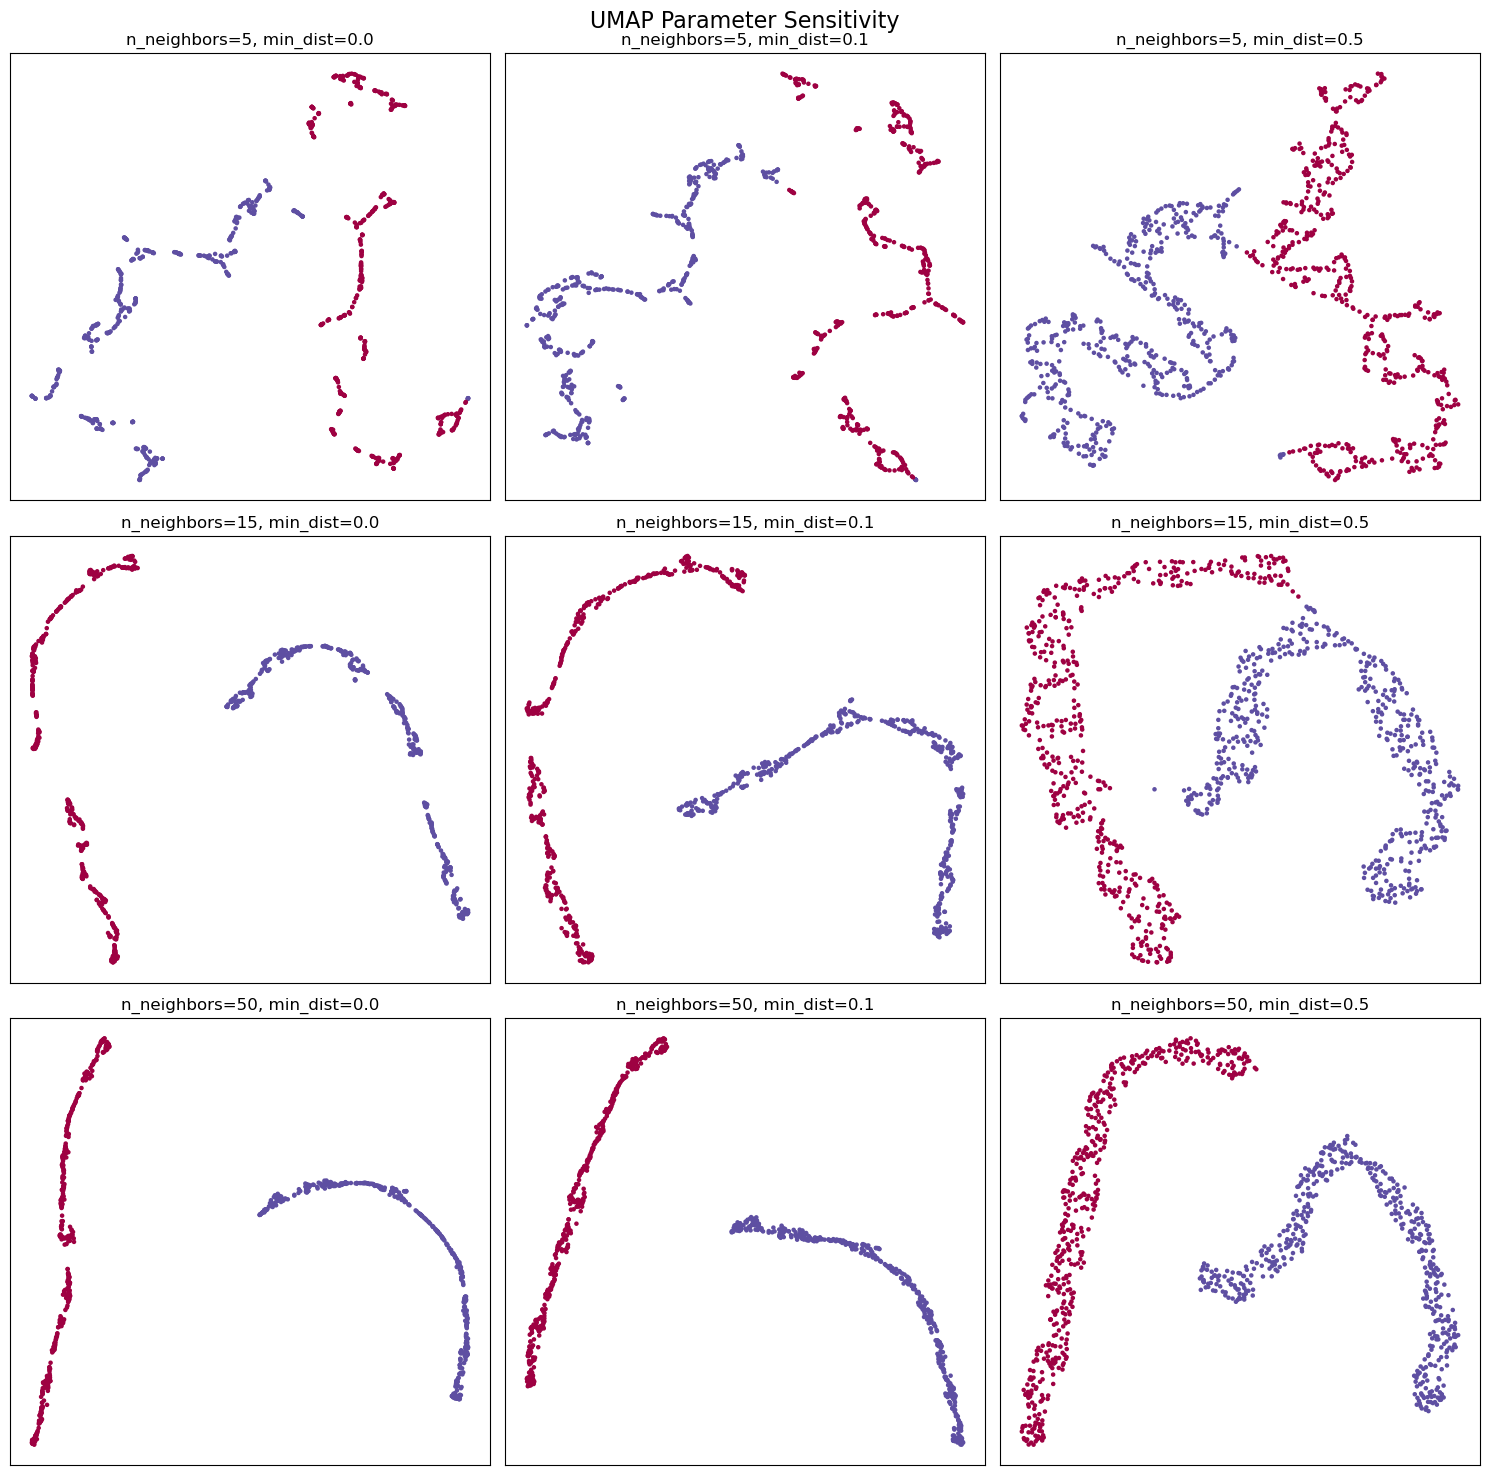

In [54]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("UMAP Parameter Sensitivity", fontsize=16)

# Define parameter ranges
n_neighbors_range = [5, 15, 50]
min_dist_range = [0.0, 0.1, 0.5]

# Generate UMAP projections for different parameter combinations
for i, n_neighbors in enumerate(n_neighbors_range):
    for j, min_dist in enumerate(min_dist_range):
        umap = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap = umap.fit_transform(X)
        
        axs[i, j].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=plt.cm.Spectral, s=5)
        axs[i, j].set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

# t-distributed stochastic neighborhood embedding (t-SNE)

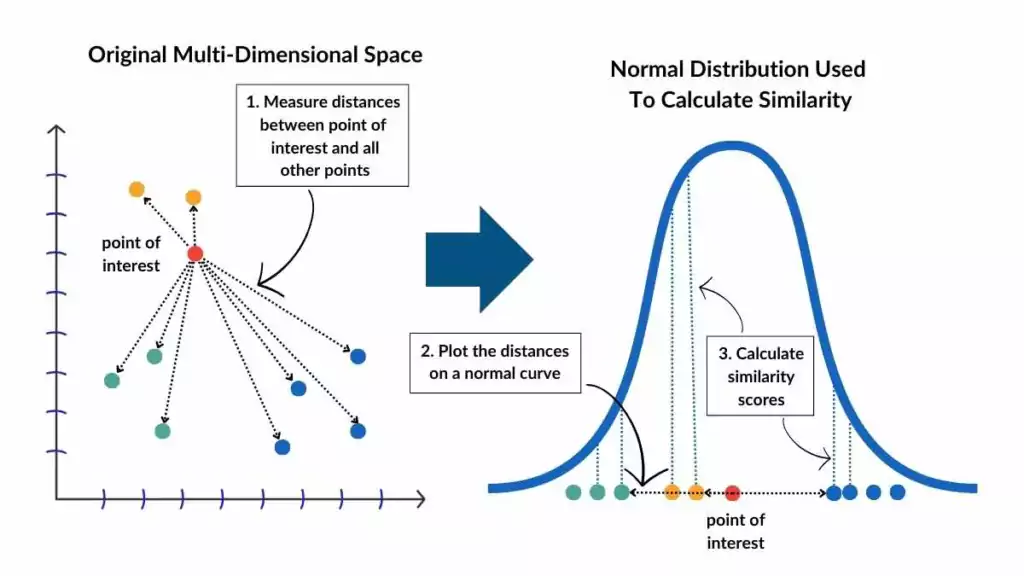

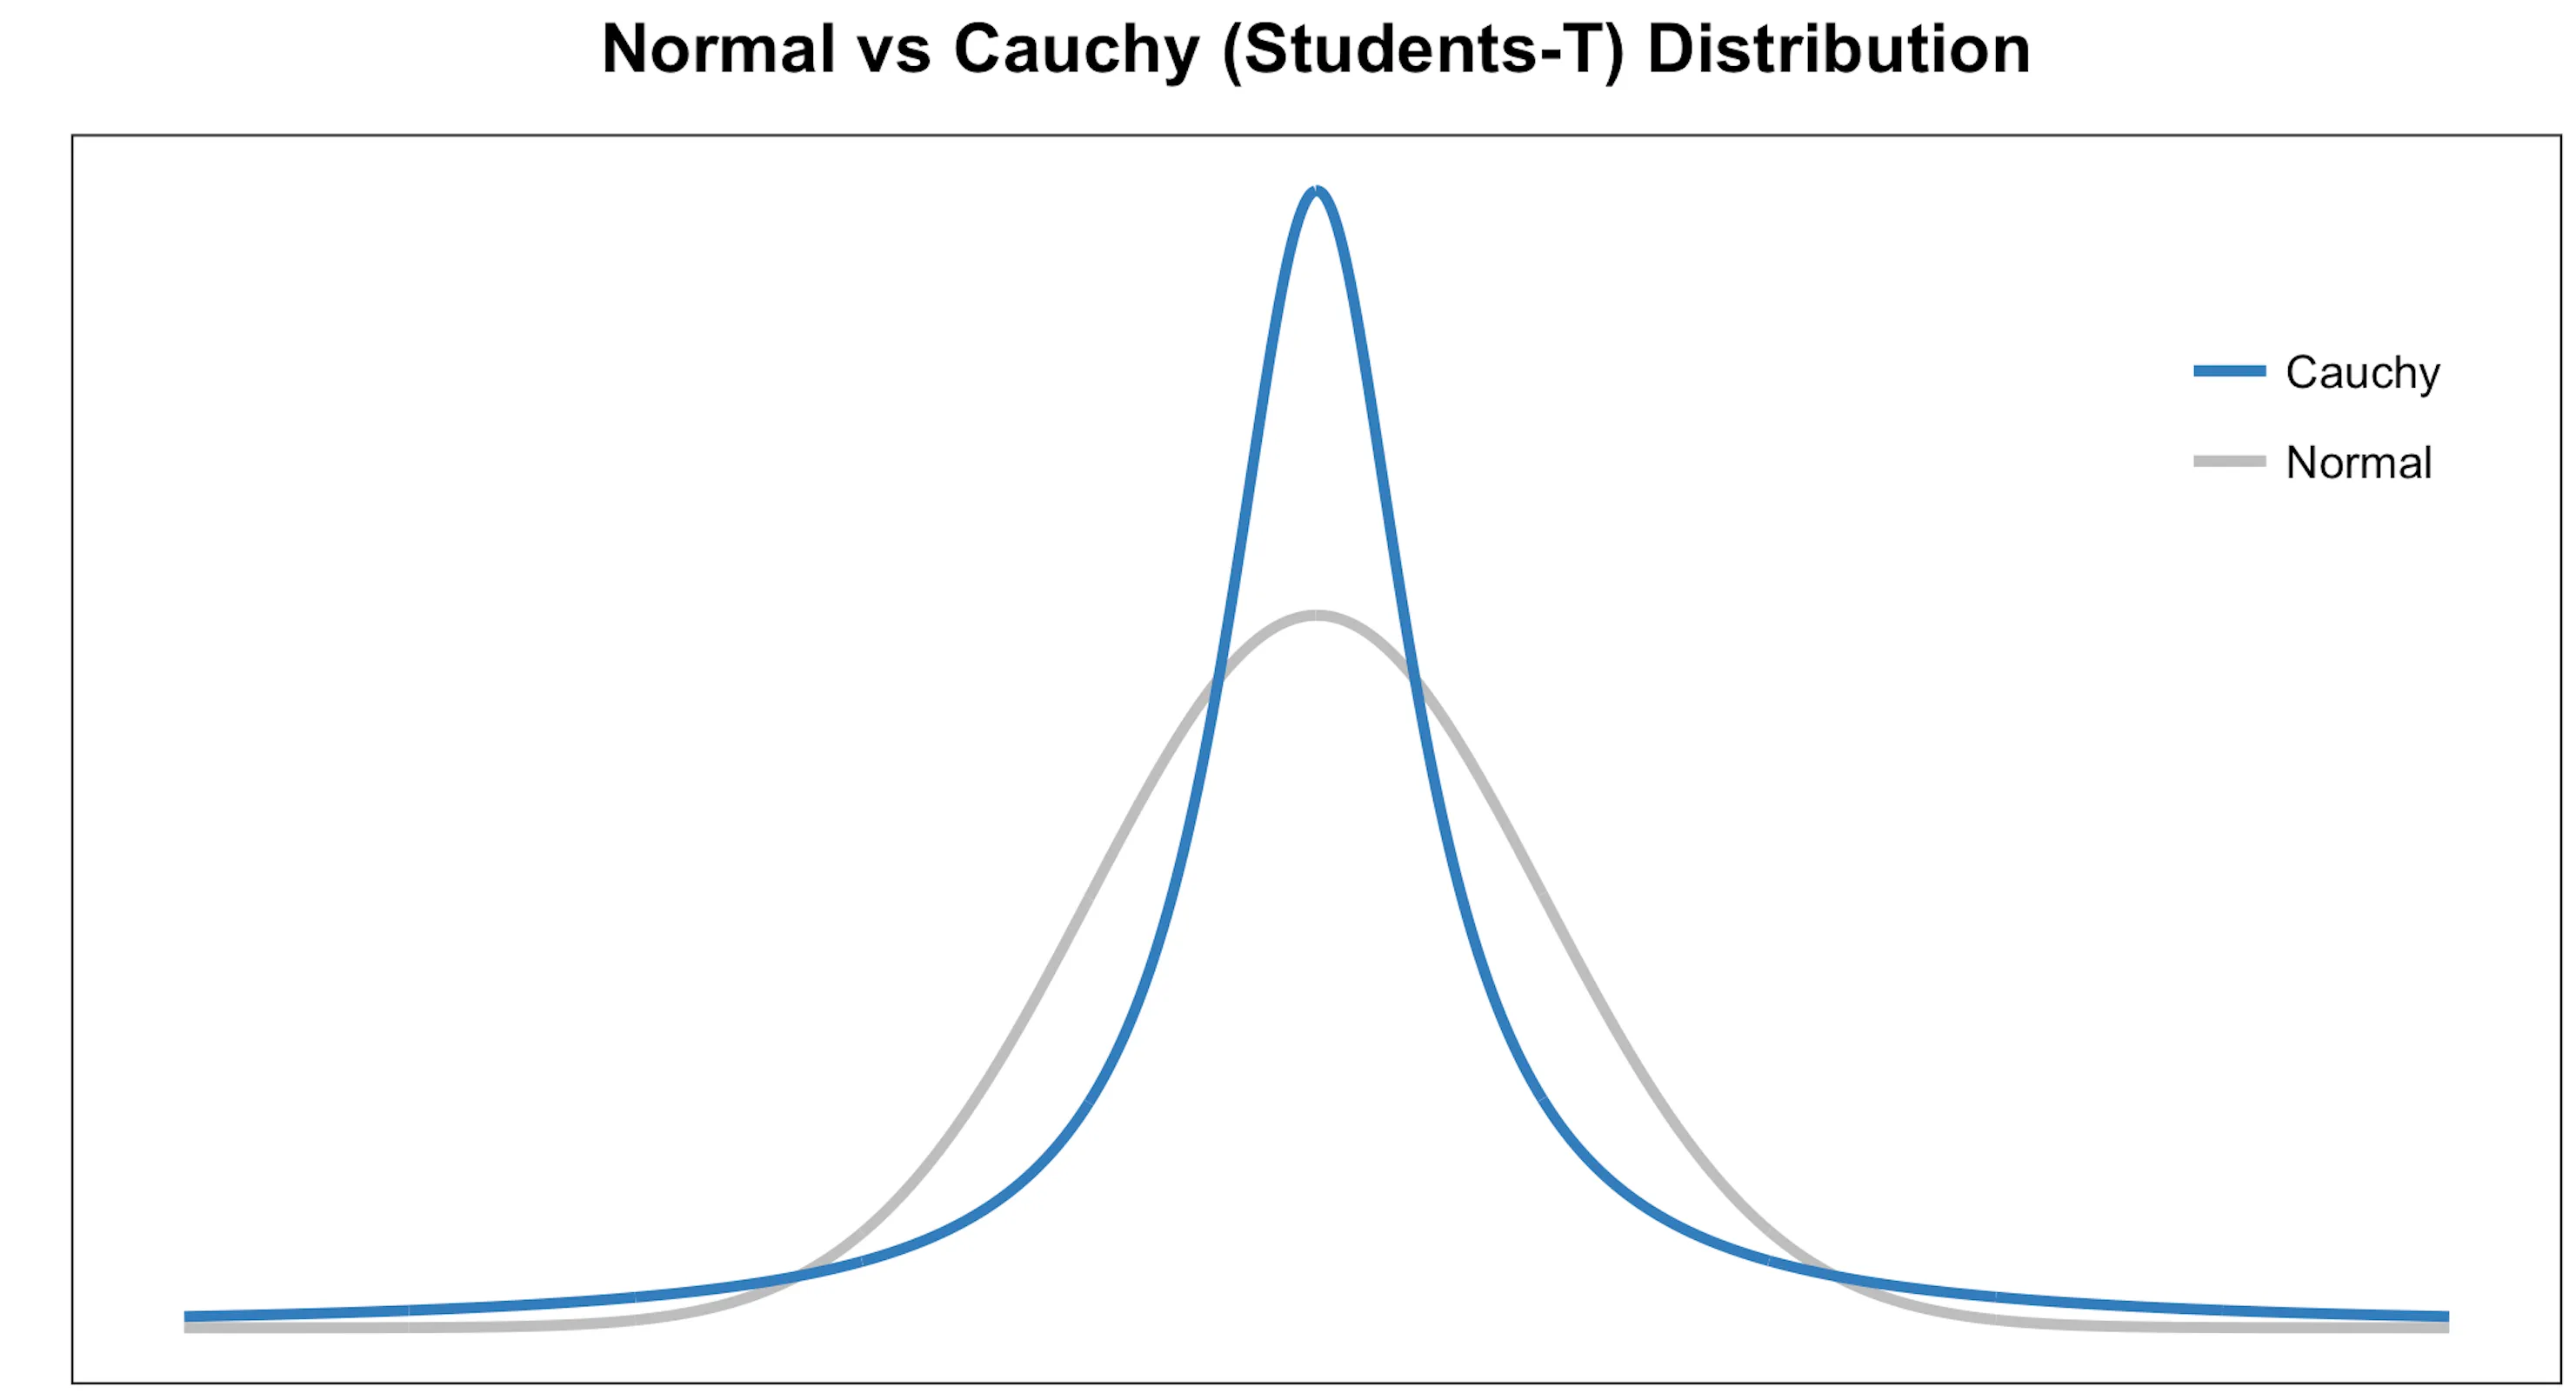

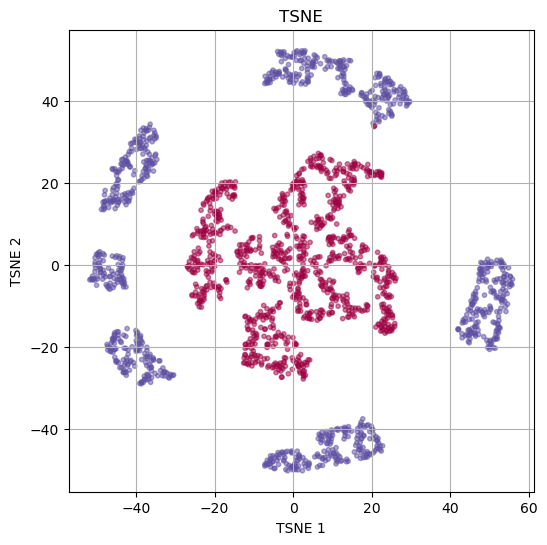

In [79]:
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(X)
plt.figure(figsize=(6, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, s=10, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE')
plt.grid(True)

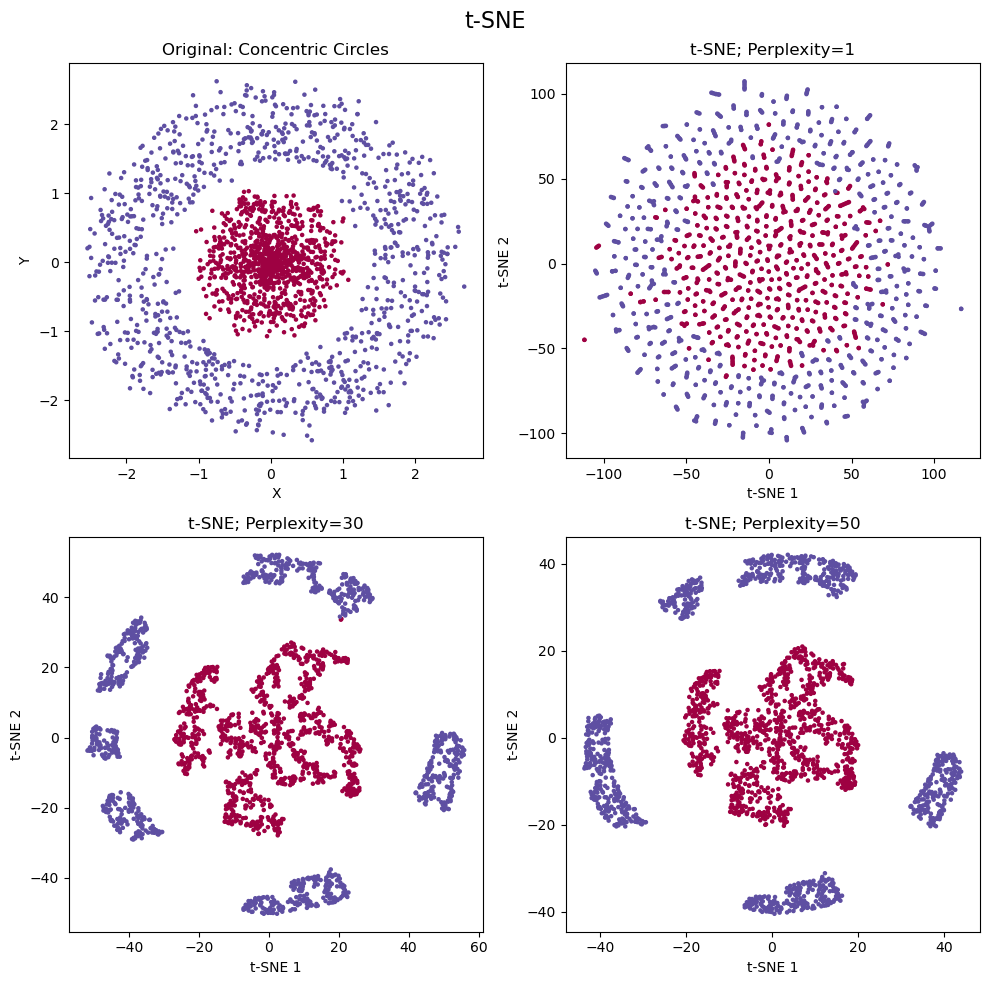

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate synthetic data in concentric circles
def generate_concentric_circles(n_samples=1000, noise=0.1):
    np.random.seed(42)
    r_inner = np.random.uniform(0, 1, n_samples // 2)
    r_outer = np.random.uniform(1.5, 2.5, n_samples // 2)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    
    x_inner = r_inner * np.cos(theta[:n_samples//2]) + np.random.normal(0, noise, n_samples//2)
    y_inner = r_inner * np.sin(theta[:n_samples//2]) + np.random.normal(0, noise, n_samples//2)
    x_outer = r_outer * np.cos(theta[n_samples//2:]) + np.random.normal(0, noise, n_samples//2)
    y_outer = r_outer * np.sin(theta[n_samples//2:]) + np.random.normal(0, noise, n_samples//2)
    
    X = np.vstack([np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))])
    y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
    
    return X, y

# Generate the dataset
X, y = generate_concentric_circles(n_samples=2000, noise=0.1)

# Visualize the original dataset
fig, axs = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle("t-SNE", fontsize=16)

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=5)
axs[0, 0].set_title('Original: Concentric Circles')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=1)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
#plt.subplot(222)
axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, s=5)
axs[0, 1].set_title('t-SNE; Perplexity=1')
axs[0, 1].set_xlabel('t-SNE 1')
axs[0, 1].set_ylabel('t-SNE 2')

plt.tight_layout()


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
axs[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, s=5)
axs[1, 0].set_title('t-SNE; Perplexity=30')
axs[1, 0].set_xlabel('t-SNE 1')
axs[1, 0].set_ylabel('t-SNE 2')

plt.tight_layout()

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results

axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, s=5)
axs[1, 1].set_title('t-SNE; Perplexity=50')
axs[1, 1].set_xlabel('t-SNE 1')
axs[1, 1].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

# Project

Download the below heavily downsampled RNASeq data and visualize it in 2D both with PCA and UMAP.

Color the points by the labels.

Data = 'X.csv.gz';

labels = 'obs.csv';

In [101]:
#make sure the filepaths are correct
data = np.genfromtxt('X.csv.gz',delimiter=',')
labels = np.genfromtxt('obs.csv',delimiter=',',dtype=str,skip_header=1)[:,1]

In [102]:
print(data.shape)

(1196, 4286)


In [103]:
labels.shape

(1196,)

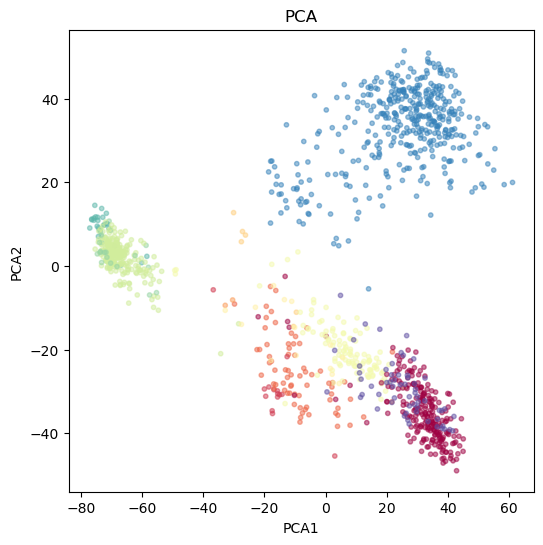

In [110]:
pca = PCA(n_components=2)
pcaD = pca.fit_transform(data)
colors = LabelEncoder().fit_transform(labels)
plt.figure(figsize=(6, 6))
plt.scatter(pcaD[:, 0], pcaD[:, 1], c=colors, s=10, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('PCA1'); 
plt.ylabel('PCA2');
plt.title('PCA');

In [112]:
data_model = umap.UMAP(random_state=42)
data_result = umap_mnist_model.fit_transform(data, n_neighbors=15, min_dist = 0.5)

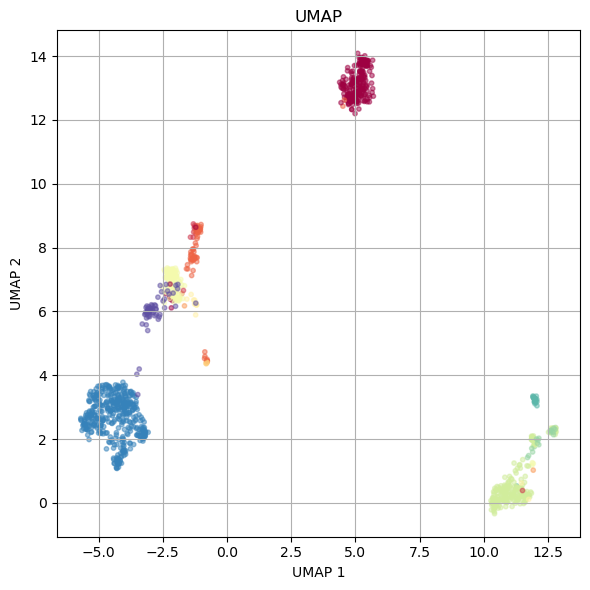

In [113]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result[:, 0], data_result[:, 1], c=colors, s=10, alpha=0.5, cmap=plt.cm.Spectral)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.grid(True)

plt.tight_layout()
plt.show();